In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [49]:
df  = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [51]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [52]:
df.shape

(891, 12)

***Handling Missing Values***

In [53]:
# Droping Cabin from df
new_df = df.drop(columns='Cabin', axis=1)

C:\Users\ayush\AppData\Local\Temp\ipykernel_24600\348645319.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Age'])


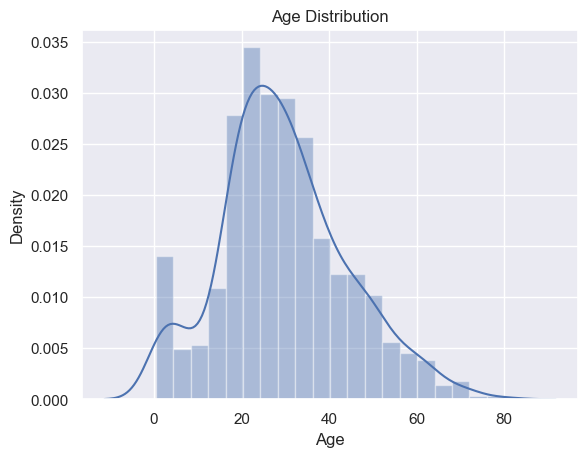

In [54]:
sns.set()
sns.distplot(new_df['Age'])
plt.title("Age Distribution")
plt.show()

In [55]:
new_df['Age'].mean()

29.69911764705882

In [56]:
new_df['Age'].fillna(new_df['Age'].mean(), inplace=True)

C:\Users\ayush\AppData\Local\Temp\ipykernel_24600\3702040433.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['Age'].fillna(new_df['Age'].mean(), inplace=True)


In [57]:
new_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [58]:
new_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [59]:
new_df['Embarked'].fillna(new_df['Embarked'].mode()[0], inplace=True)

C:\Users\ayush\AppData\Local\Temp\ipykernel_24600\2217445888.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['Embarked'].fillna(new_df['Embarked'].mode()[0], inplace=True)


In [60]:
new_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

***Data Analysis***

In [61]:
new_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [62]:
new_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

***Data Visualization***

<Axes: xlabel='Sex', ylabel='count'>

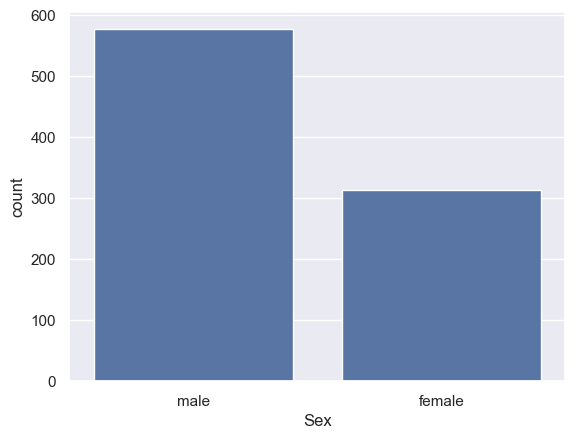

In [66]:
# Making a count plot for Sex column
sns.set()
sns.countplot(new_df, x='Sex')

<Axes: xlabel='Sex', ylabel='count'>

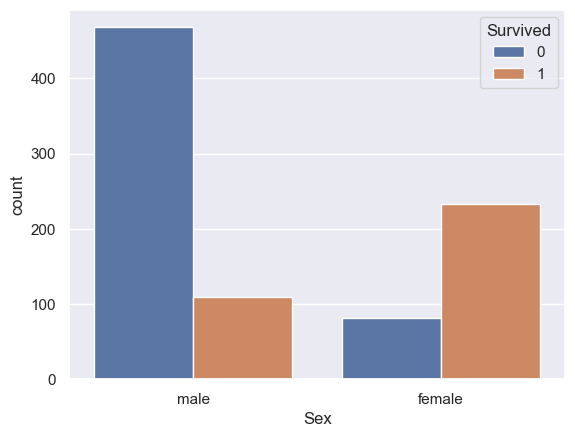

In [67]:
# Number of survivors gender-wise

sns.countplot(new_df, x="Sex", hue="Survived")

<Axes: xlabel='Pclass', ylabel='count'>

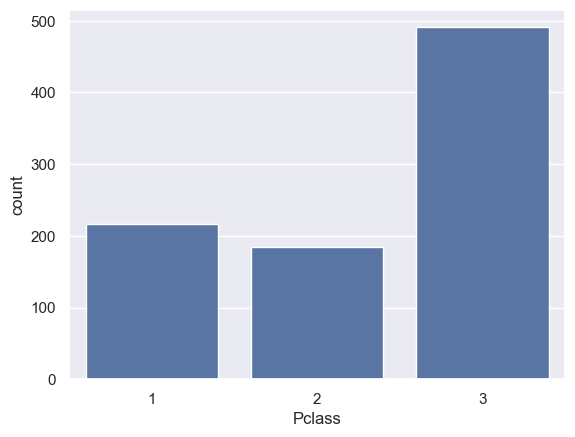

In [68]:
# Countplot for pclass

sns.countplot(new_df, x="Pclass")

<Axes: xlabel='Pclass', ylabel='count'>

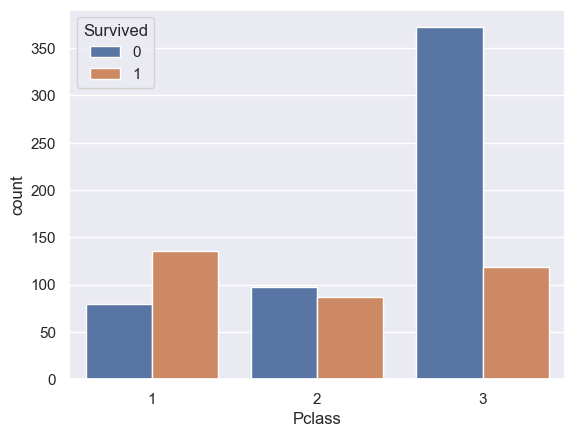

In [69]:
sns.countplot(new_df, x="Pclass", hue="Survived")

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
encoder = LabelEncoder()

In [74]:
new_df['Sex'] = encoder.fit_transform(new_df.Sex)
new_df['Embarked'] = encoder.fit_transform(new_df.Embarked)

In [75]:
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [76]:
X = new_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
Y = new_df['Survived']

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=0.2, random_state=2)

In [78]:
X_train.shape

(712, 7)

In [79]:
clf = LogisticRegression()

In [80]:
clf.fit(X_train, Y_train)

LogisticRegression()

In [81]:
y_hat = clf.predict(X_test)

In [82]:
print("Testing accuracy score: ", accuracy_score(Y_test, y_hat))

Testing accuracy score:  0.7877094972067039


In [83]:
# Checking the training data accuracy
y_hat_train = clf.predict(X_train)

In [84]:
print("Testing accuracy score: ", accuracy_score(Y_train, y_hat_train))

Testing accuracy score:  0.8132022471910112
